Remember to document your thoughts and any takeaways as you work through visualizations!

Using your store items data you prepped in lesson 2 exercises:

- Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.
- Validate your splits by plotting X_train and y_train.
- Plot the weekly average & the 7-day moving average. Compare the 2 plots.
- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
- Plot a time series decomposition.
- Create a lag plot (day over day).
- Run a lag correlation.

In [125]:
import acquire

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import TimeSeriesSplit

In [35]:
grocery = acquire.get_all_data()

In [34]:
# fmt = '%a, %d %b %Y %H:%M:%S %Z'

# pd.to_datetime('now').tz_localize('America/Chicago').strftime(fmt)

# grocery.sale_date = pd.to_datetime(grocery.sale_date, format=fmt)

# # # don't forget to sort!
# grocery = grocery.sort_values(by='sale_date').set_index('sale_date')

In [4]:
# tscv = TimeSeriesSplit(n_splits=int((len(y)-3)/3))
# for train_index, test_index in tscv.split(X):
#      print("TRAIN:", train_index, "TEST:", test_index)

#      #To get the indices 
#      X_train, X_test = X[train_index], X[test_index]
#      y_train, y_test = y[train_index], y[test_index]

In [67]:
y = grocery.sale_amount
X = grocery.sale_date

In [114]:
print(len(X))

913000


In [117]:
tss = TimeSeriesSplit(n_splits=5, max_train_size=None)

for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(f"Length of Train, Test: {len(train_index)}, {len(test_index)}")
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: [     0      1      2 ... 152167 152168 152169] TEST: [152170 152171 152172 ... 304333 304334 304335]
Length of Train, Test: 152170, 152166
TRAIN: [     0      1      2 ... 304333 304334 304335] TEST: [304336 304337 304338 ... 456499 456500 456501]
Length of Train, Test: 304336, 152166
TRAIN: [     0      1      2 ... 456499 456500 456501] TEST: [456502 456503 456504 ... 608665 608666 608667]
Length of Train, Test: 456502, 152166
TRAIN: [     0      1      2 ... 608665 608666 608667] TEST: [608668 608669 608670 ... 760831 760832 760833]
Length of Train, Test: 608668, 152166
TRAIN: [     0      1      2 ... 760831 760832 760833] TEST: [760834 760835 760836 ... 912997 912998 912999]
Length of Train, Test: 760834, 152166


In [69]:
tss_gen = tss.split(X)

In [70]:
#Unpacking the splits
sample_train_1id, sample_test_1id = next(tss_gen)
sample_train_2id, sample_test_2id = next(tss_gen)
sample_train_3id, sample_test_3id = next(tss_gen)
sample_train_4id, sample_test_4id = next(tss_gen)
sample_train_5id, sample_test_5id = next(tss_gen)

In [107]:
#Sample 1
X_train1 = X.iloc[sample_train_1id]
y_train1 = y.iloc[sample_train_1id]

X_test1 = X.iloc[sample_test_1id]
y_test1 = y.iloc[sample_test_1id]

train1 = pd.DataFrame(index=sample_train_1id, columns=["X"])
train1["X"] = X_train1.copy()
train1["y"] = y_train1.copy()

test1 = pd.DataFrame(index=sample_test_1id, columns=["X"])
test1["X"] = X_test1.copy()
test1["y"] = y_test1.copy()

train1.set_index("X")
test1.set_index("X")

,y
X,
"Fri, 05 Sep 2014 00:00:00 GMT",38.0
"Sat, 06 Sep 2014 00:00:00 GMT",34.0
"Sun, 07 Sep 2014 00:00:00 GMT",44.0
"Mon, 08 Sep 2014 00:00:00 GMT",24.0
"Tue, 09 Sep 2014 00:00:00 GMT",29.0
"Wed, 10 Sep 2014 00:00:00 GMT",35.0
"Thu, 11 Sep 2014 00:00:00 GMT",38.0
"Fri, 12 Sep 2014 00:00:00 GMT",29.0
"Sat, 13 Sep 2014 00:00:00 GMT",32.0


In [108]:
#Sample 2
X_train2 = X.iloc[sample_train_2id]
y_train2 = y.iloc[sample_train_2id]

X_test2 = X.iloc[sample_test_2id]
y_test2 = y.iloc[sample_test_2id]

train2 = pd.DataFrame(index=sample_train_2id, columns=["X"])
train2["X"] = X_train2.copy()
train2["y"] = y_train2.copy()

test2 = pd.DataFrame(index=sample_test_2id, columns=["X"])
test2["X"] = X_test2.copy()
test2["y"] = y_test2.copy()

train2.set_index("X")
test2.set_index("X")

,y
X,
"Thu, 05 May 2016 00:00:00 GMT",47.0
"Fri, 06 May 2016 00:00:00 GMT",51.0
"Sat, 07 May 2016 00:00:00 GMT",65.0
"Sun, 08 May 2016 00:00:00 GMT",50.0
"Mon, 09 May 2016 00:00:00 GMT",25.0
"Tue, 10 May 2016 00:00:00 GMT",51.0
"Wed, 11 May 2016 00:00:00 GMT",28.0
"Thu, 12 May 2016 00:00:00 GMT",36.0
"Fri, 13 May 2016 00:00:00 GMT",55.0


In [109]:
#Sample 3
X_train3 = X.iloc[sample_train_3id]
y_train3 = y.iloc[sample_train_3id]

X_test3 = X.iloc[sample_test_3id]
y_test3 = y.iloc[sample_test_3id]

train3 = pd.DataFrame(index=sample_train_3id, columns=["X"])
train3["X"] = X_train3.copy()
train3["y"] = y_train3.copy()

test3 = pd.DataFrame(index=sample_test_3id, columns=["X"])
test3["X"] = X_test3.copy()
test3["y"] = y_test3.copy()

train3.set_index("X")
test3.set_index("X")

,y
X,
"Thu, 03 Jan 2013 00:00:00 GMT",11.0
"Fri, 04 Jan 2013 00:00:00 GMT",7.0
"Sat, 05 Jan 2013 00:00:00 GMT",12.0
"Sun, 06 Jan 2013 00:00:00 GMT",9.0
"Mon, 07 Jan 2013 00:00:00 GMT",11.0
"Tue, 08 Jan 2013 00:00:00 GMT",9.0
"Wed, 09 Jan 2013 00:00:00 GMT",13.0
"Thu, 10 Jan 2013 00:00:00 GMT",9.0
"Fri, 11 Jan 2013 00:00:00 GMT",11.0


In [110]:
#Sample 4
X_train4 = X.iloc[sample_train_4id]
y_train4 = y.iloc[sample_train_4id]

X_test4 = X.iloc[sample_test_4id]
y_test4 = y.iloc[sample_test_4id]

train4 = pd.DataFrame(index=sample_train_4id, columns=["X"])
train4["X"] = X_train4.copy()
train4["y"] = y_train4.copy()

test4 = pd.DataFrame(index=sample_test_4id, columns=["X"])
test4["X"] = X_test4.copy()
test4["y"] = y_test4.copy()

train4.set_index("X")
test4.set_index("X")

,y
X,
"Wed, 03 Sep 2014 00:00:00 GMT",21.0
"Thu, 04 Sep 2014 00:00:00 GMT",22.0
"Fri, 05 Sep 2014 00:00:00 GMT",21.0
"Sat, 06 Sep 2014 00:00:00 GMT",15.0
"Sun, 07 Sep 2014 00:00:00 GMT",25.0
"Mon, 08 Sep 2014 00:00:00 GMT",19.0
"Tue, 09 Sep 2014 00:00:00 GMT",19.0
"Wed, 10 Sep 2014 00:00:00 GMT",21.0
"Thu, 11 Sep 2014 00:00:00 GMT",13.0


In [111]:
#Sample 5
X_train5 = X.iloc[sample_train_5id]
y_train5 = y.iloc[sample_train_5id]

X_test5 = X.iloc[sample_test_5id]
y_test5 = y.iloc[sample_test_5id]

train5 = pd.DataFrame(index=sample_train_5id, columns=["X"])
train5["X"] = X_train5.copy()
train5["y"] = y_train5.copy()

test5 = pd.DataFrame(index=sample_test_5id, columns=["X"])
test5["X"] = X_test5.copy()
test5["y"] = y_test5.copy()

train5.set_index("X")
test5.set_index("X")

,y
X,
"Tue, 03 May 2016 00:00:00 GMT",38.0
"Wed, 04 May 2016 00:00:00 GMT",49.0
"Thu, 05 May 2016 00:00:00 GMT",36.0
"Fri, 06 May 2016 00:00:00 GMT",44.0
"Sat, 07 May 2016 00:00:00 GMT",50.0
"Sun, 08 May 2016 00:00:00 GMT",57.0
"Mon, 09 May 2016 00:00:00 GMT",29.0
"Tue, 10 May 2016 00:00:00 GMT",42.0
"Wed, 11 May 2016 00:00:00 GMT",45.0


In [49]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'
grocery_train.sale_date = pd.to_datetime(grocery_train.sale_date, format=fmt)

grocery_test.sale_date = pd.to_datetime(grocery_test.sale_date, format=fmt)

In [41]:
# fmt = '%a, %d %b %Y %H:%M:%S %Z'

# # pd.to_datetime('now').tz_localize('America/Chicago').strftime(fmt)

# grocery.sale_date = pd.to_datetime(grocery.sale_date, format=fmt)

# # don't forget to sort!
# grocery = grocery.sort_values(by='sale_date').set_index('sale_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760834 entries, 0 to 760833
Data columns (total 2 columns):
sale_date      760834 non-null object
sale_amount    760834 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.4+ MB


In [121]:
print(len(train5))
print(len(test5))

760834
152166


Text(0.5, 1.0, 'Train and Test - Sample 1')

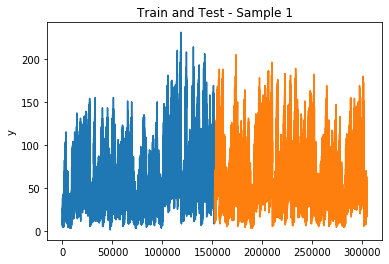

In [126]:
sns.lineplot(x=train1.index, y="y",data=train1)
sns.lineplot(x=test1.index, y="y",data=test1)

plt.title("Train and Test - Sample 1")

Text(0.5, 1.0, 'Train and Test - Sample 2')

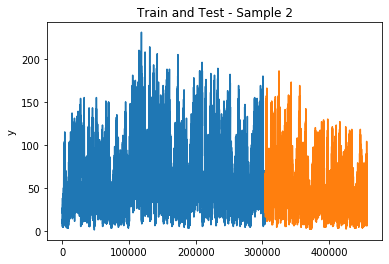

In [127]:
sns.lineplot(x=train2.index, y="y",data=train2)
sns.lineplot(x=test2.index, y="y",data=test2)

plt.title("Train and Test - Sample 2")

Text(0.5, 1.0, 'Train and Test - Sample 3')

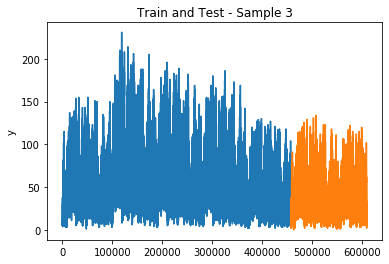

In [128]:
sns.lineplot(x=train3.index, y="y",data=train3)
sns.lineplot(x=test3.index, y="y",data=test3)

plt.title("Train and Test - Sample 3")

Text(0.5, 1.0, 'Train and Test - Sample 4')

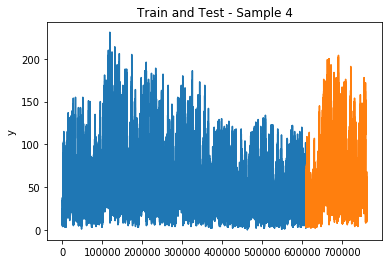

In [129]:
sns.lineplot(x=train4.index, y="y",data=train4)
sns.lineplot(x=test4.index, y="y",data=test4)

plt.title("Train and Test - Sample 4")

Text(0.5, 1.0, 'Train and Test - Sample 5')

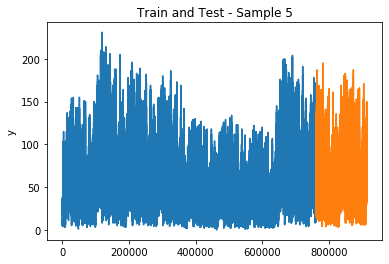

In [130]:
sns.lineplot(x=train5.index, y="y",data=train5)
sns.lineplot(x=test5.index, y="y",data=test5)

plt.title("Train and Test - Sample 5")